In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [13]:
cat = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [14]:
cat = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

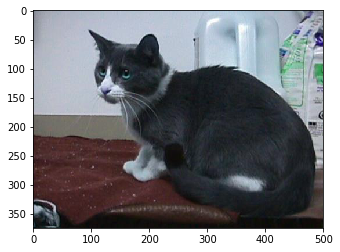

In [15]:
plt.imshow(cat)

In [16]:
cat.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [10]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

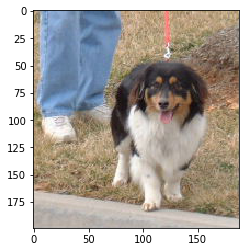

In [11]:
plt.imshow(dog)

In [12]:
dog.shape

(199, 188, 3)

In [18]:
#Prepare data


In [19]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [24]:
image_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                              )

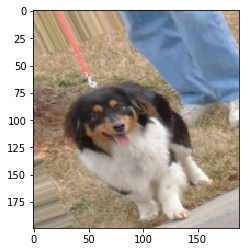

In [25]:
plt.imshow(image_gen.random_transform(dog))

In [26]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [27]:
#Create model

In [28]:
input_shape = (150,150,3)

In [29]:
from keras.models import Sequential

In [37]:
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(input_shape),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(input_shape),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(input_shape),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [43]:
#Random transformations on data set

In [40]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [44]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [46]:
#results = model.fit_generator(train_image_gen,epochs=100,
#steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)


In [47]:
#Load pre-trained model

In [48]:
from keras.models import load_model

In [52]:
new_model = load_model('/Users/coreycohen/Documents/Pre-trained/cat_dog_100epochs.h5')

In [53]:
#Predictions 

In [66]:
dog_file = 'CATS_DOGS/test/DOG/10003.jpg'

In [55]:
from keras.preprocessing import image

In [67]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [68]:
dog_img = image.img_to_array(dog_img)

In [69]:
dog_img.shape

(150, 150, 3)

In [70]:
#Change so neural net thinks its batch size of one image
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [71]:
dog_img.shape

(1, 150, 150, 3)

In [72]:
dog_img = dog_img/255

In [73]:
model.predict_classes(dog_img)

array([[1]], dtype=int32)